# '한국복지패널데이터' 분석 

#### 한국복지패널데이터
- 한국보건사회연구원 발간
- 가구의 경제활동을 연구해 정책 지원에 반영할 목적
- 2006~2015년까지 전국에서 7000여 가구를 선정해 매년 추적 조사
- 경제활동, 생활실태, 복지욕구 등 수천 개 변수에 대한 정보로 구성

## 데이터 분석 준비하기
#### 패키지 준비하기

In [1]:
# 패키지 준비하기
install.packages("foreign")  # foreign 패키지 설치
library(foreign)             # SPSS 파일 로드
library(dplyr)               # 전처리
library(ggplot2)             # 시각화
library(readxl)              # 엑셀 파일 불러오기

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'foreign' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'foreign'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\admin\Documents\R\win-library\3.6\00LOCK\foreign\libs\x64\foreign.dll를 C:\Users\admin\Documents\R\win-library\3.6\foreign\libs\x64\foreign.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'foreign'"


The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpY5hIig\downloaded_packages


Warning message:
"package 'foreign' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'readxl' was built under R version 3.6.3"

In [2]:
# 데이터 불러오기
raw_welfare <- read.spss(file = "Koweps_hpc10_2015_beta1.sav",
                         to.data.frame = T)

Warning message in read.spss(file = "Koweps_hpc10_2015_beta1.sav", to.data.frame = T):
"Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100"

In [3]:
# 복사본 만들기
welfare <- raw_welfare

In [4]:
#### 데이터 검토하기
head(welfare)
tail(welfare)
dim(welfare)

h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
1,1,1,10101,0,NA,1,1,864,864,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,1,1,20101,0,NA,1,1,600,600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,1,1,30101,0,NA,1,1,1571,1619,...,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,1,1,60101,0,NA,1,1,3030,3486,...,NA,NA,NA,NA,NA,NA,NA,3000,0,NA


,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
16659,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,7163,0,NA
16660,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
16661,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,3630,NA,NA,0,NA
16662,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,700,NA,0,NA
16663,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
16664,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA


[1] 16664   957

In [5]:
# 변수명 바꾸기
welfare <- rename(welfare,
                  sex = h10_g3,            # 성별
                  birth = h10_g4,          # 태어난 연도
                  marriage = h10_g10,      # 혼인 상태
                  religion = h10_g11,      # 종교
                  income = p1002_8aq1,     # 월급
                  code_job = h10_eco9,     # 직종 코드
                  code_region = h10_reg7)  # 지역 코드

In [6]:
head(welfare)

h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,code_region,h10_din,h10_cin,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
1,1,1,10101,0,NA,1,1,864,864,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,1,1,20101,0,NA,1,1,600,600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,1,1,30101,0,NA,1,1,1571,1619,...,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,1,1,60101,0,NA,1,1,3030,3486,...,NA,NA,NA,NA,NA,NA,NA,3000,0,NA


## 모델링

### 변수 하나 선택 : sex (월급 ~ 성별)

In [8]:
fit <- lm(income~sex, data=welfare)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
sex,1,26010154,26010153.91,915.7155,1.026278e-183
Residuals,4632,131568199,28404.19,NA,NA



Call:
lm(formula = income ~ sex, data = welfare)

Residuals:
    Min      1Q  Median      3Q     Max 
-311.83 -102.20  -27.80   53.96 2237.80 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  462.387      7.704   60.02   <2e-16 ***
sex         -150.093      4.960  -30.26   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 168.5 on 4632 degrees of freedom
  (12030 observations deleted due to missingness)
Multiple R-squared:  0.1651,	Adjusted R-squared:  0.1649 
F-statistic: 915.7 on 1 and 4632 DF,  p-value: < 2.2e-16


- r 스퀘어 낮음, 설명력 떨어짐
- p-value 0.05 이하, 유의수준 

- X가 Y에 미치는 영향은 유의하다. 
- 하지만 우리가 추정한 회귀식에서 각 값들의 분산이 커서 예측에 대해서는 신뢰하기 힘들다.

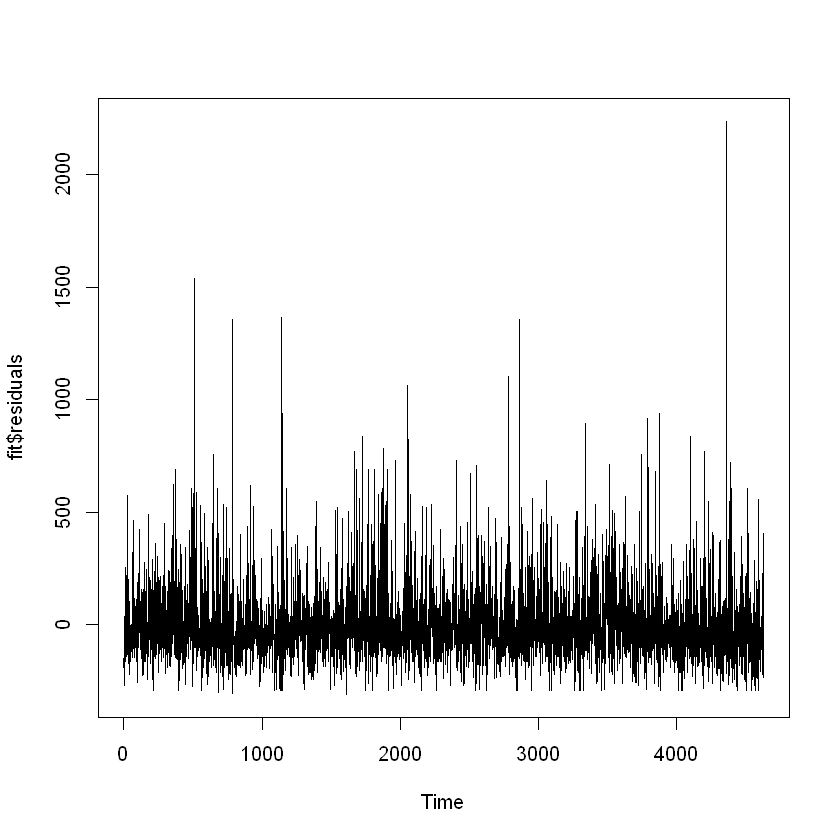

In [9]:
ts.plot(fit$residuals)

- 오차가 너무 높은 것들이 있다... 이상치를 제거해야 성능이 좋아질 것 같다.
- 전처리 Go

## 전처리

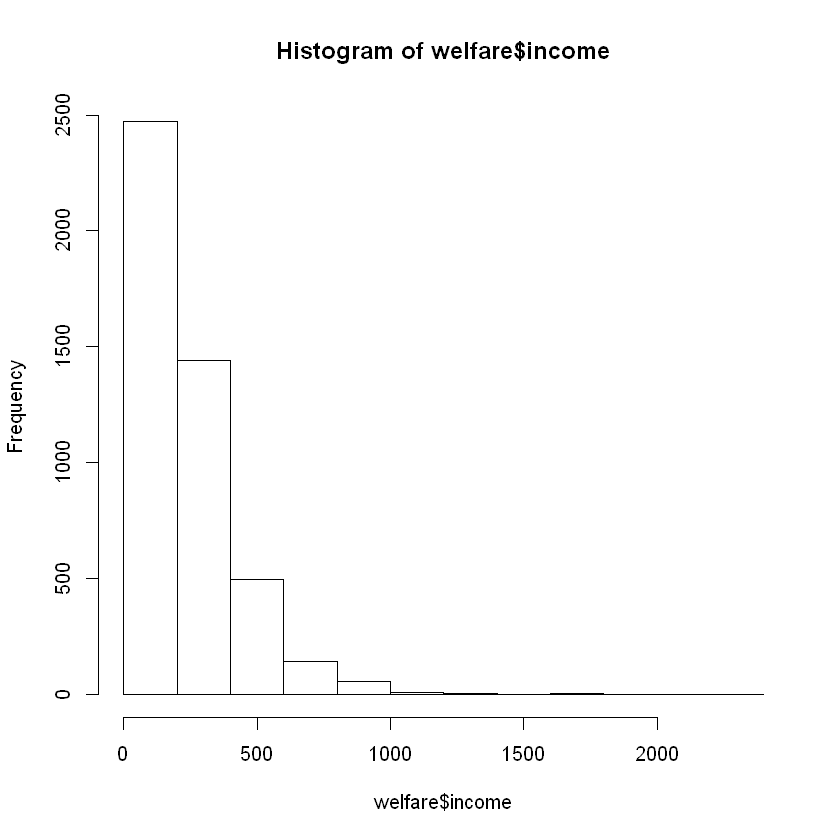

In [10]:
# 히스토그램으로 월급 분포 확인
hist(welfare$income)

- 월급 분석을 1000까지로 제한해 봅니다.

In [11]:
# 이상치 확인
summary(welfare$income)

# 이상치 결측 처리
welfare$income <- ifelse(welfare$income > 1000, NA, welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

In [12]:
# 이상치 재확인
summary(welfare$income)

# 결측치 확인
table(is.na(welfare$income))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   121.3   191.7   236.7   313.0  1000.0   12051 


FALSE  TRUE 
 4613 12051 

- 재도전

In [13]:
fit <- lm(income~sex, data=welfare)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
sex,1,23602525,23602525.07,1017.746,5.578885e-202
Residuals,4611,106933585,23190.97,NA,NA



Call:
lm(formula = income ~ sex, data = welfare)

Residuals:
    Min      1Q  Median      3Q     Max 
-303.99  -96.95  -25.17   55.55  838.83 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  447.718      6.984   64.11   <2e-16 ***
sex         -143.272      4.491  -31.90   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 152.3 on 4611 degrees of freedom
  (12051 observations deleted due to missingness)
Multiple R-squared:  0.1808,	Adjusted R-squared:  0.1806 
F-statistic:  1018 on 1 and 4611 DF,  p-value: < 2.2e-16


- R-squared가 0.02 올랐다...
    - Adjusted R-squared:  0.1649 -> Adjusted R-squared:  0.1806
- 오르긴 올랐는데.. 한참 멀다..

## 변수 전부 선택

In [7]:
# 변수 전부 선택
fit2 <- lm(income~., data=welfare)

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


- 변수를 전부 선택했더니 에러가 난다. 957개의 feature 중 무엇이 문제일까요?

- 에러의 원인을 찾기는 너무나 힘든 일입니다.

- 그래서 그냥 일단 이름 변경한 몇개만 선택해봅니다..

In [14]:
fit2 <- lm(income~sex+birth+marriage+religion+code_job+code_region, data=welfare)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
sex,1,23602525,23602525.07,1017.746,5.578885e-202
Residuals,4611,106933585,23190.97,NA,NA



Call:
lm(formula = income ~ sex, data = welfare)

Residuals:
    Min      1Q  Median      3Q     Max 
-303.99  -96.95  -25.17   55.55  838.83 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  447.718      6.984   64.11   <2e-16 ***
sex         -143.272      4.491  -31.90   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 152.3 on 4611 degrees of freedom
  (12051 observations deleted due to missingness)
Multiple R-squared:  0.1808,	Adjusted R-squared:  0.1806 
F-statistic:  1018 on 1 and 4611 DF,  p-value: < 2.2e-16


- 한꺼번에 다 넣었을 때의 Adjusted R-squared는  0.1806 

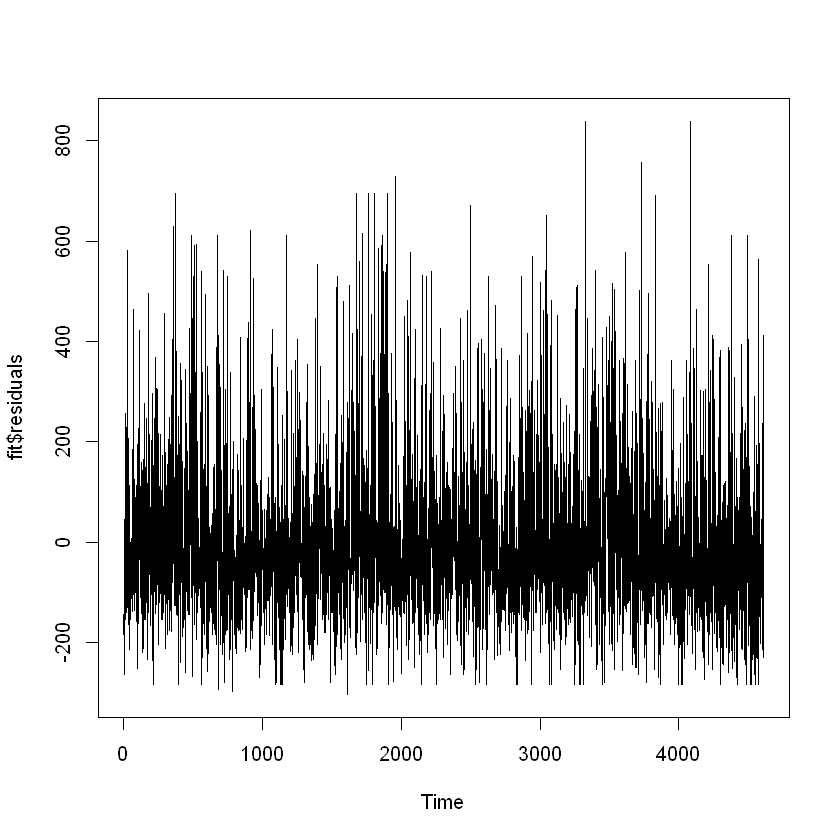

In [15]:
ts.plot(fit$residuals)

그래도 오차가 왔다갔다 하는군요..

lm basic2 에서 했던 코드들을 적용해봅니다.

In [16]:
index<-abs(fit2$coefficients)[-1] >0.5
index

sex       birth    marriage    religion    code_job code_region 
       TRUE        TRUE        TRUE        TRUE       FALSE        TRUE

code_job은 탈락할 예정입니다.

In [17]:
var<-names(index)[index==T]
var

[1] "sex"         "birth"       "marriage"    "religion"    "code_region"

합격한 변수들의 목록입니다.

In [18]:
fo<-paste0("income~",paste(var,collapse = "+"))
fo

[1] "income~sex+birth+marriage+religion+code_region"

이런 식이 나오는군요.

In [20]:
fit3<-lm(fo,data=welfare)

In [21]:
summary(fit3)


Call:
lm(formula = fo, data = welfare)

Residuals:
    Min      1Q  Median      3Q     Max 
-336.36  -89.13  -24.77   50.70  835.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6962.2461   354.5882 -19.635  < 2e-16 ***
sex          -136.6065     4.2496 -32.146  < 2e-16 ***
birth           3.7951     0.1812  20.948  < 2e-16 ***
marriage      -30.7978     1.4559 -21.154  < 2e-16 ***
religion        1.5798     4.3053   0.367 0.713671    
code_region    -3.7538     1.0291  -3.647 0.000268 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 143.1 on 4607 degrees of freedom
  (12051 observations deleted due to missingness)
Multiple R-squared:  0.2776,	Adjusted R-squared:  0.2768 
F-statistic: 354.1 on 5 and 4607 DF,  p-value: < 2.2e-16


- ..... R-sqaure에 큰 상승이 있었습니다. 무려 약 0.1 정도 씩이나..

- Adjusted R-squared:  0.1806 -> Adjusted R-squared:  0.2768 

In [22]:
# MSE
mean(fit3$residuals^2)

[1] 20441.87

- 전처리의 필요성이 심각하게 있어 보입니다.

- lm basic3 에서 했던 코드들을 적용해봅니다.


 1
 2
 3
 4
 5
 6
 7
 8
 9
 10

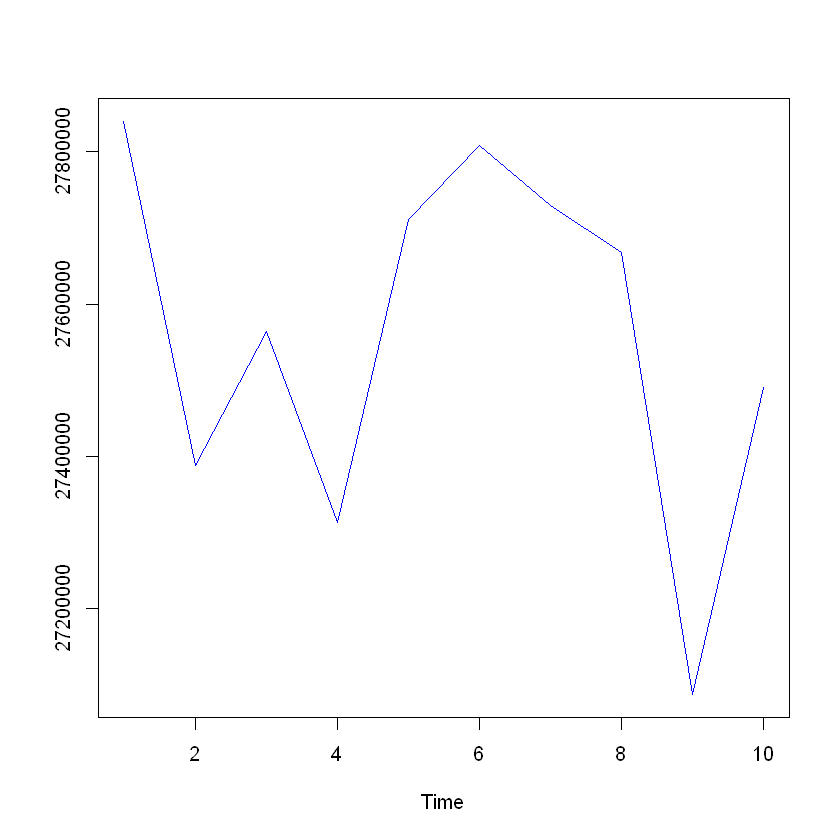

In [34]:
require(graphics)
## 100 -> 70 : 30 / 80 : 20
# 70 -> 학습/ 30-> 검증(테스트) 
# 4 : 3 : 3 (학습/검증/테스트)

m1<-c()
m2<-c()

for(i in 1:10){
  sam<-sample(1:nrow(welfare),nrow(welfare)*0.7)
  
  fit2<-lm(income~sex+birth+marriage+religion+code_job+code_region, data=welfare[sam,])
  # mean((fit2$residuals^2)) # MSE
  
  pred<-predict(fit2,welfare[-sam,])
  m1[i]<-mean((pred-welfare[-sam,1])^2)
  
  ##회귀 분석의 경우 모델의 성능지표 MSE / MAPE / MAE
  index<-abs(fit2$coefficients)[-1] >0.5
  var<-names(index)[index==T]
  fo<-paste0("income~",paste(var,collapse = "+"))
  fit3<-lm(fo,data=welfare[sam,])
  pred2<-predict(fit3,welfare[-sam,])
  m2[i]<-mean((pred2-welfare[-sam,1])^2)
  cat("\n",i)
}

ts.plot(cbind(m1,m2),col=c("red","blue"))

뭔가 그래프가 나왔는데 어떻게 해야할지 모르겠습니다.

In [35]:
mean(m1)
mean(m2)

[1] NA

[1] 27560333

- ??? 왜 m1은 비어있는걸까요?

In [39]:
summary(fit2)


Call:
lm(formula = income ~ sex + birth + marriage + religion + code_job + 
    code_region, data = welfare[sam, ])

Residuals:
   Min     1Q Median     3Q    Max 
-363.1  -83.0  -18.1   50.6  815.7 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.195e+03  4.414e+02  -7.239 5.64e-13 ***
sex         -1.459e+02  4.835e+00 -30.176  < 2e-16 ***
birth        1.929e+00  2.244e-01   8.595  < 2e-16 ***
marriage    -2.452e+01  1.668e+00 -14.703  < 2e-16 ***
religion     9.128e+00  4.895e+00   1.865   0.0623 .  
code_job    -1.850e-01  9.018e-03 -20.514  < 2e-16 ***
code_region -2.950e+00  1.174e+00  -2.513   0.0120 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 136 on 3231 degrees of freedom
  (8426 observations deleted due to missingness)
Multiple R-squared:  0.3551,	Adjusted R-squared:  0.3539 
F-statistic: 296.5 on 6 and 3231 DF,  p-value: < 2.2e-16


- ??? 얘는 갑자기 왜 오른걸까요?

In [40]:
summary(fit3)


Call:
lm(formula = fo, data = welfare[sam, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-334.04  -91.37  -25.24   50.62  835.60 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6884.948    428.422 -16.070  < 2e-16 ***
sex          -137.729      5.122 -26.889  < 2e-16 ***
birth           3.753      0.219  17.137  < 2e-16 ***
marriage      -29.543      1.753 -16.850  < 2e-16 ***
religion        4.780      5.198   0.920  0.35781    
code_region    -3.932      1.247  -3.154  0.00163 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 144.6 on 3232 degrees of freedom
  (8426 observations deleted due to missingness)
Multiple R-squared:  0.2711,	Adjusted R-squared:   0.27 
F-statistic: 240.4 on 5 and 3232 DF,  p-value: < 2.2e-16


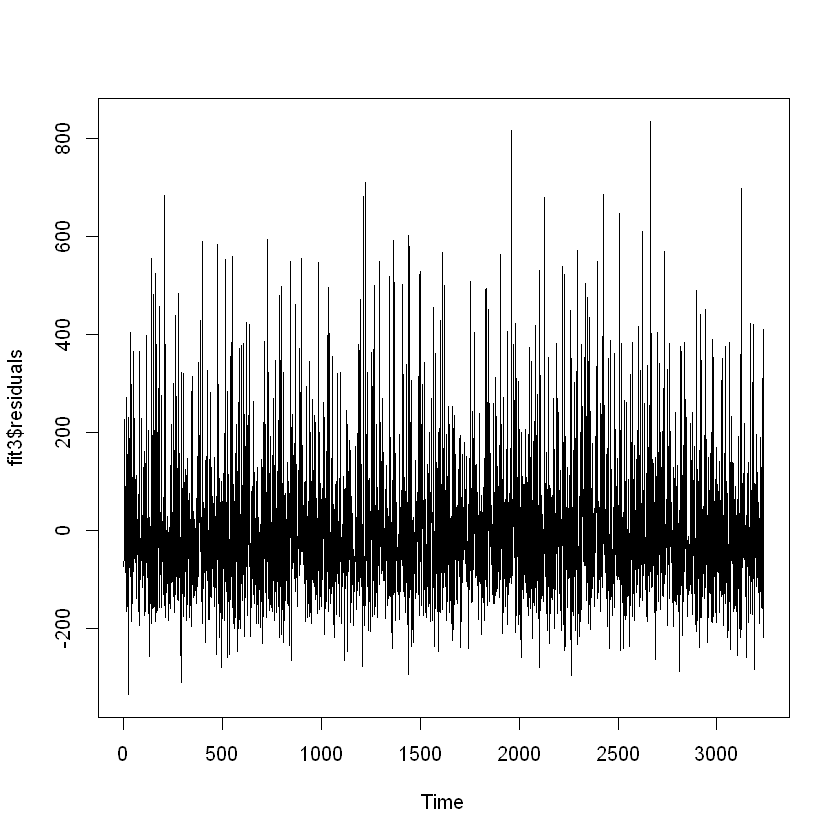

In [42]:
ts.plot(fit3$residuals)

- 어떻게든 이 녀석을 처리하지 않으면 상관관계를 설명하기 어려울 것 같습니다.

- 결론은 내지 못한 채 미궁 속으로...